In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
#Bibliotecas para generar gráficos
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

from sklearn import tree

In [61]:
young = pd.read_csv('./diario.csv', sep=';')

In [62]:
young.head()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha
0,2,2,3,3,3,3,NaN,34,150,No,No,06:30,23:40,D,1/6/2017
1,2,2,3,3,3,3,NaN,38,150,NO,No,06:45,00:15,D,2/6/2017
2,2,1,3,3,3,3,NaN,39,120,NO,No,07:00,00:15,D,3/6/2017
3,1,2,2,2,2,3,NaN,34,120,No,No,07:00,01:30,D,4/6/2017
4,1,1,3,2,2,2,NaN,32,150,No,No,07:00,23:45,D,5/6/2017


In [63]:
young=young.replace(to_replace="No", value=0)
young = young.replace(to_replace="Si", value=1)
young=young.replace(to_replace="NO", value=0)
young=young.replace(to_replace="no", value=0)
young = young.replace(to_replace="SI", value=1)

In [64]:
young1=young.drop(columns=["Fecha","Hora de despertar","Hora a la que te dormiste","Ciclo menstrual"])

In [65]:
young1

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Código
0,2,2,3,3,3,3,34,150,0.0,0.0,D
1,2,2,3,3,3,3,38,150,0.0,0.0,D
2,2,1,3,3,3,3,39,120,0.0,0.0,D
3,1,2,2,2,2,3,34,120,0.0,0.0,D
4,1,1,3,2,2,2,32,150,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...,...
660,3,-2,4,4,4,4,0,300,1.0,0.0,G
661,-3,2,1,0,1,0,0,200,0.0,0.0,G
662,3,2,1,3,3,3,2,300,0.0,1.0,G
663,-3,-1,3,1,3,2,15,100,0.0,0.0,M


In [66]:
feature_cols = ['Estado de ánimo','Motivación','Problemas de concentración y atención','Irritabilidad','Ansiedad','Calidad del sueño','Número de cigarrillos','Cafeína']

X = young1[feature_cols] # Features
y = young1['Código'] # Target variable

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [68]:
#Optimization Decision Tree
ard = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
ard = ard.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = ard.predict(X_test)

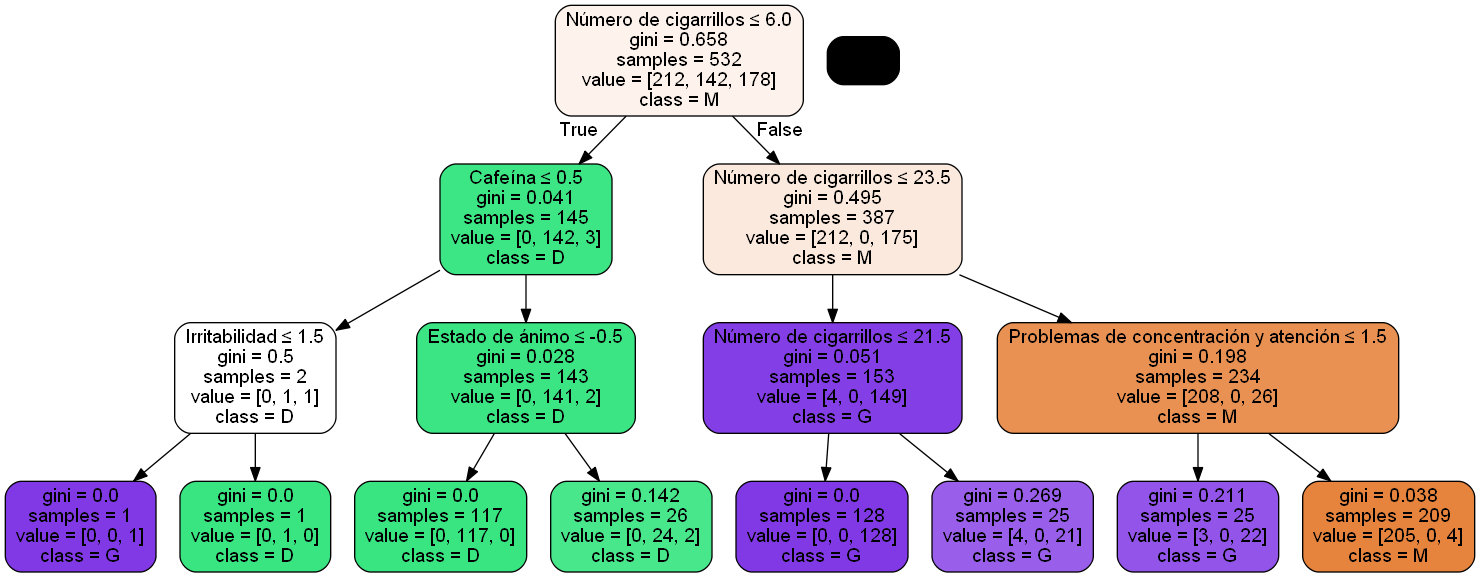

In [70]:
dot_data = StringIO()
export_graphviz(ard, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['M','D','G'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('prediccion.png')
Image(graph.create_png())